In [1]:
a = 1

In [2]:
# num = int(input("Enter the number : - "))


# if num == a:
#     print("Ok you enter the correct number")
# else:
#     print("Sorry you enter wrong input !")

In [3]:
import numpy as np

A = np.array([
    [-1, 2, -1],
    [3, -7, -2],
    [2, 2, 1]
])

B = np.array([
    9,
    -20,
    2
])

X = np.linalg.inv(A).dot(B)
print(X)


[-1.  3. -2.]


In [4]:
print(A)

[[-1  2 -1]
 [ 3 -7 -2]
 [ 2  2  1]]


In [5]:
print(B)

[  9 -20   2]


In [6]:
import numpy as np

def check_linear_independence(vectors):
    # Convert list of vectors to a matrix
    matrix = np.array(vectors).T  # Transpose to make each vector a column
    rank = np.linalg.matrix_rank(matrix)
    num_vectors = matrix.shape[1]
    
    print("Matrix:\n", matrix)
    print("Rank of the matrix:", rank)

    if rank == num_vectors:
        print("✅ The vectors are linearly independent.")
    else:
        print("❌ The vectors are linearly dependent.")

# Example 1: Independent vectors in R^3
vectors1 = [
    [1, -1, 2],  # Vector 1
    [2, 1, 3],   # Vector 2
    [-1, 0, 2]   # Vector 3
]

# Example 2: Dependent vectors (second is multiple of first)
vectors2 = [
    [1, 2],     # Vector 1
    [2, 4]      # Vector 2 (2 × vector 1)
]

print("Example 1:")
check_linear_independence(vectors1)

print("\nExample 2:")
check_linear_independence(vectors2)


Example 1:
Matrix:
 [[ 1  2 -1]
 [-1  1  0]
 [ 2  3  2]]
Rank of the matrix: 3
✅ The vectors are linearly independent.

Example 2:
Matrix:
 [[1 2]
 [2 4]]
Rank of the matrix: 1
❌ The vectors are linearly dependent.


In [7]:
import seaborn as sns
import statistics as stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
# Load titanic dataset
titanic = sns.load_dataset("titanic")

In [9]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


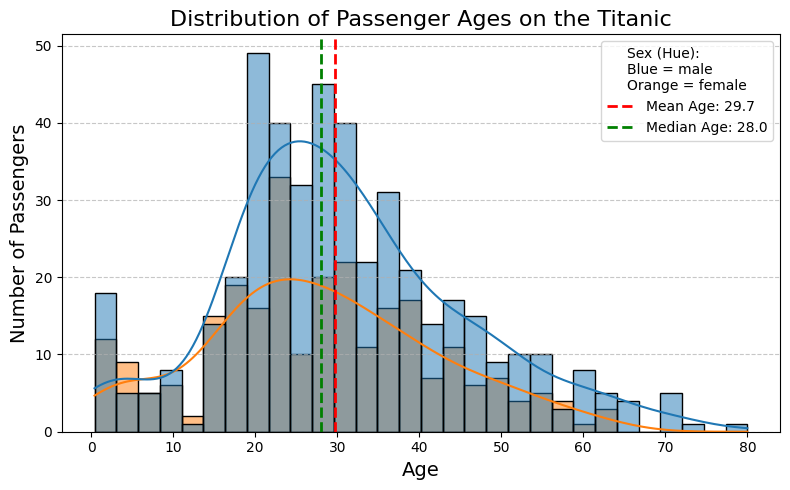

In [10]:
plt.figure(figsize=(8, 5))

# Plot the age distribution for male and female passengers separately
hist = sns.histplot(
    data=titanic,
    x='age',
    hue='sex',            # This colors the bars by sex: one color for male, another for female
    kde=True,
    bins=30,
    edgecolor='black'
)

# Add a title and axis labels
plt.title('Distribution of Passenger Ages on the Titanic', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)

# Add grid lines for easier reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Draw vertical lines for the mean and median age
mean_age = titanic['age'].mean()
median_age = titanic['age'].median()
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f"Mean Age: {mean_age:.1f}")
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=2, label=f"Median Age: {median_age:.1f}")

# Show the legend with a clear title for hue
plt.legend(title='Sex (Hue):\nBlue = male\nOrange = female')
plt.tight_layout()

This graph shows a **right-skewed (positively skewed) distribution** of passenger ages on the Titanic.

### What it means:
- **Most passengers are younger:** The highest bars are on the left (lower ages), showing that most passengers were children or young adults.
- **Fewer older passengers:** The bars decrease as age increases, but there are still some older passengers, creating a "tail" to the right.
- **Mean > Median:** The mean age (red dashed line) is slightly higher than the median age (green dashed line), which is typical for right-skewed distributions.
- **Comparison by sex:** The hue (color) shows the age distribution for males and females separately, but both follow a similar right-skewed pattern.

**Summary:**  
Most Titanic passengers were young, with fewer older passengers, resulting in a right-skewed age distribution.

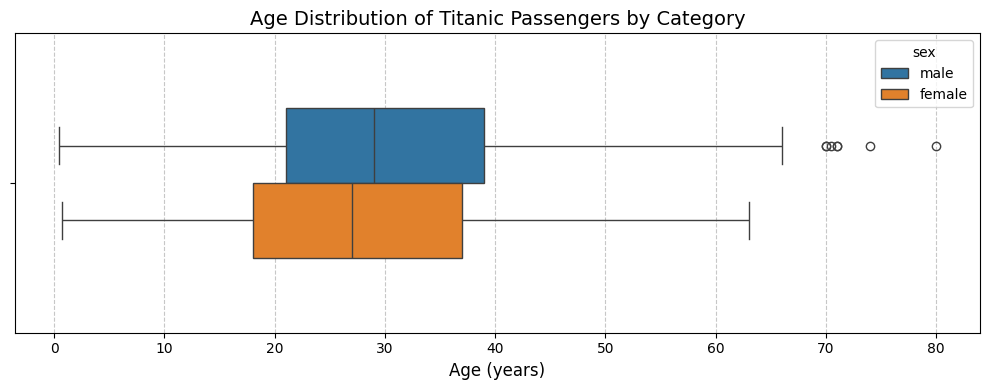

In [11]:
# Set figure size
plt.figure(figsize=(10, 4))

# Create boxplot with 'who' categories
sns.boxplot(
    data=titanic,
    x='age',
    hue='sex',           # Add hue for who categories (man/woman/child)
    orient='h',
    width=0.5
)

# Add title and labels
plt.title('Age Distribution of Titanic Passengers by Category', fontsize=14)
plt.xlabel('Age (years)', fontsize=12)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Here's how to calculate the Interquartile Range (IQR) for the age column in the Titanic dataset:



Original dataset shape: (891, 15)
Dataset shape after removing outliers: (703, 15)
Number of outliers removed: 188


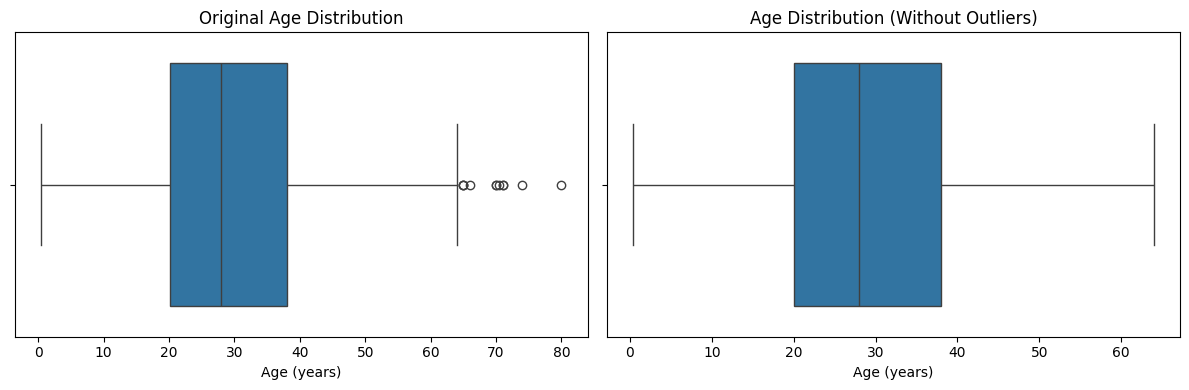

In [12]:
# Calculate Q1, Q3, and IQR
Q1 = titanic['age'].quantile(0.25)
Q3 = titanic['age'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create new dataframe without age outliers
titanic_no_outliers = titanic[(titanic['age'] >= lower_bound) & (titanic['age'] <= upper_bound)]

# Print the results
print(f"Original dataset shape: {titanic.shape}")
print(f"Dataset shape after removing outliers: {titanic_no_outliers.shape}")
print(f"Number of outliers removed: {titanic.shape[0] - titanic_no_outliers.shape[0]}")

# Create a boxplot to visualize the difference
plt.figure(figsize=(12, 4))

# Original data boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=titanic['age'], orient='h')
plt.title('Original Age Distribution')
plt.xlabel('Age (years)')

# Data without outliers boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=titanic_no_outliers['age'], orient='h')
plt.title('Age Distribution (Without Outliers)')
plt.xlabel('Age (years)')

plt.tight_layout()
plt.show()

In [13]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
titanic.shape[0]

891

In [15]:
titanic_no_outliers.shape[0]

703

In [16]:
# No of outliers remove
print(f" Number of outlier remove : {titanic.shape[0] - titanic_no_outliers.shape[0]}")

 Number of outlier remove : 188


In [17]:
from scipy import stats

In [18]:
stats.kurtosis(titanic['age'],fisher=False)  # Calculate kurtosis for the 'age' column, excluding NaN values

nan

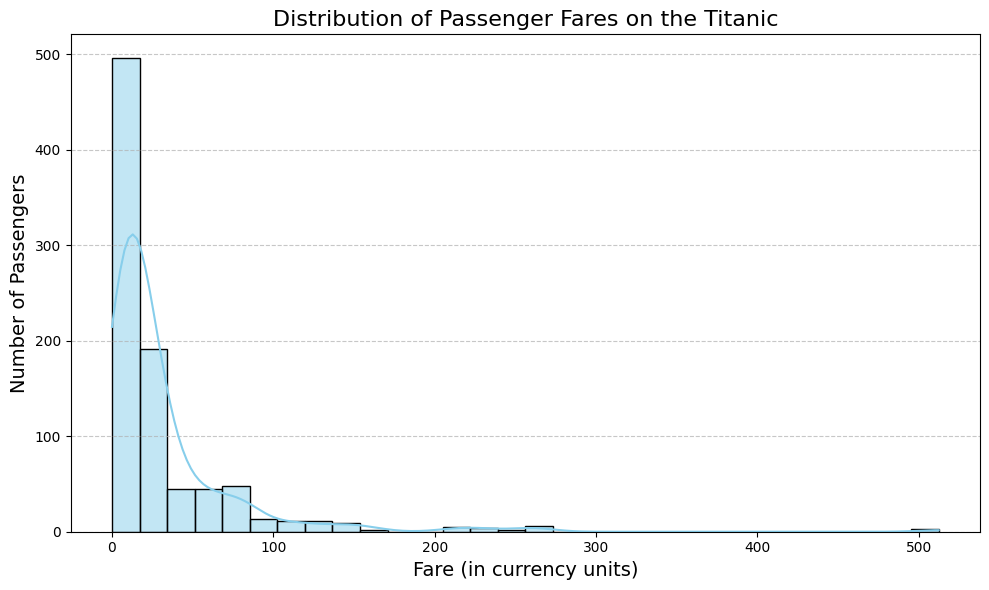

In [19]:
plt.figure(figsize=(10, 6))

# Plot histogram of fare with KDE
sns.histplot(
    data=titanic,
    x='fare',
    kde=True,  # Add Kernel Density Estimate (KDE) for smooth curve
    bins=30,   # Set number of bins for better granularity
    color='skyblue',  # Set color for the bars
    edgecolor='black' # Add edge color for better visibility
)

# Add title and axis labels
plt.title('Distribution of Passenger Fares on the Titanic', fontsize=16)
plt.xlabel('Fare (in currency units)', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [20]:
stats.kurtosis(titanic['fare'], fisher=False)  # Calculate kurtosis for the 'fare' column, excluding NaN values

36.20428925264474

In [21]:
stats.skew(titanic['fare'], nan_policy='omit')  # Calculate skewness for the 'fare' column, excluding NaN values

4.7792532923723545

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [23]:
df = sns.load_dataset("titanic")

In [24]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
df.isnull().sum()  # Check for missing values in the dataset

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [26]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


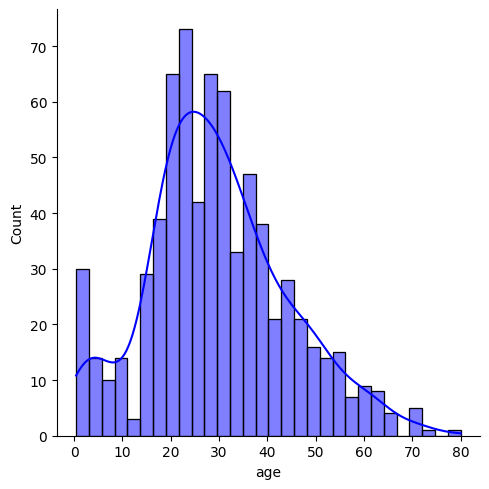

In [27]:
sns.displot(df['age'], kde=True, bins=30, color='blue')

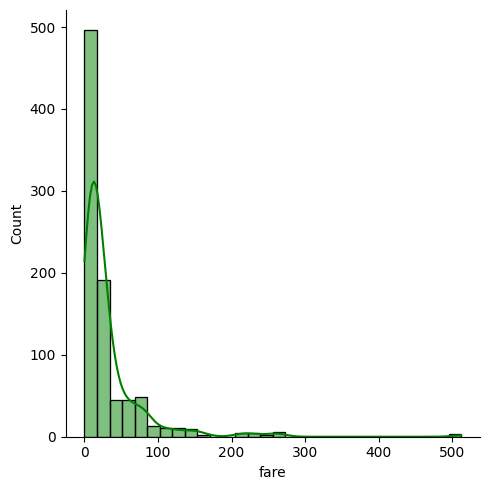

In [28]:
sns.displot(df['fare'], kde=True, bins=30, color='green')
plt.show()

In [29]:
min_max_scaler = MinMaxScaler()

In [30]:
df['fare'] = min_max_scaler.fit_transform(df[['fare']])  # Normalize the 'fare' column

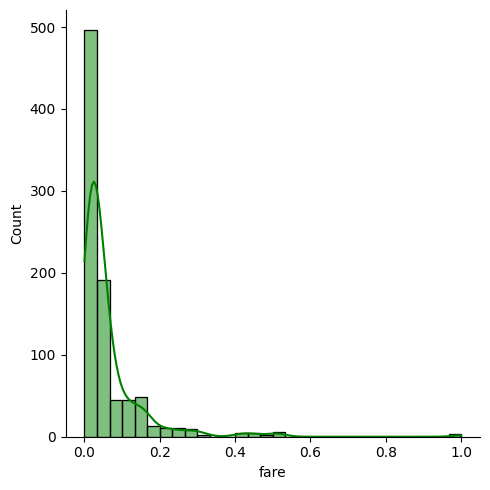

In [31]:
sns.displot(df['fare'], kde=True, bins=30, color='green')

In [32]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,0.014151,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,0.139136,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,0.015469,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,0.103644,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,0.015713,S,Third,man,True,NaN,Southampton,no,True


In [33]:
df.duplicated().sum() # Count the number of duplicate rows in the DataFrame

107

In [34]:
df.shape

(891, 15)

In [35]:
df.drop_duplicates(keep='first', inplace=True)  # Remove duplicate rows, keeping the first occurrence

In [36]:
df.duplicated().sum()  # Count the number of duplicate rows in the DataFrame

0

In [37]:
df.duplicated().sum()  # Count the number of duplicate rows in the DataFrame

0

In [38]:
df['embarked'].value_counts()

embarked
S    568
C    155
Q     59
Name: count, dtype: int64

In [39]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,784.000000,784.000000,678.000000,784.000000,784.000000,784.000000
mean,0.411990,2.243622,29.869351,0.522959,0.415816,0.067753
std,0.492507,0.855056,14.759076,0.986231,0.836922,0.101810
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,0.015713
50%,0.000000,3.000000,28.250000,0.000000,0.000000,0.031035
75%,1.000000,3.000000,39.000000,1.000000,1.000000,0.066577
max,1.000000,3.000000,80.000000,8.000000,6.000000,1.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   pclass       784 non-null    int64   
 2   sex          784 non-null    object  
 3   age          678 non-null    float64 
 4   sibsp        784 non-null    int64   
 5   parch        784 non-null    int64   
 6   fare         784 non-null    float64 
 7   embarked     782 non-null    object  
 8   class        784 non-null    category
 9   who          784 non-null    object  
 10  adult_male   784 non-null    bool    
 11  deck         202 non-null    category
 12  embark_town  782 non-null    object  
 13  alive        784 non-null    object  
 14  alone        784 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 77.0+ KB


C:\Users\moham\AppData\Local\Temp\ipykernel_20612\1458614745.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, bins=30)
C:\Users\moham\AppData\Local\Temp\ipykernel_20612\1458614745.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], kde=True, bins=30)
C:\Users\moham

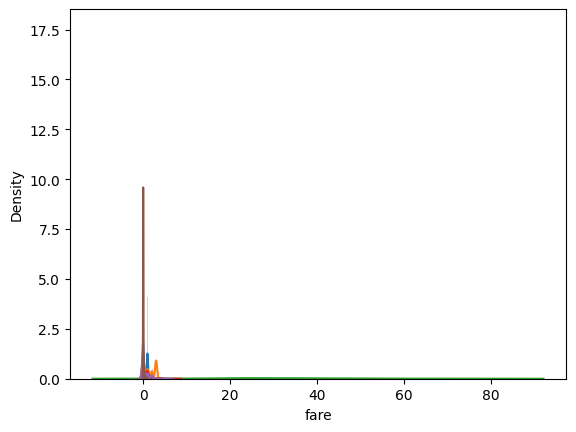

In [41]:
for col in df.select_dtypes(include=['int64','float64']).columns:
    sns.distplot(df[col], kde=True, bins=30)

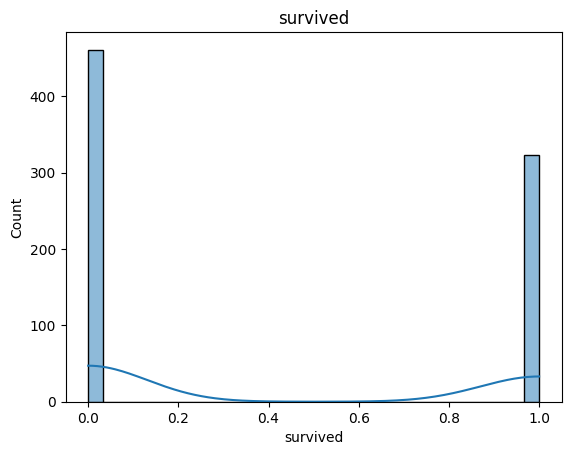

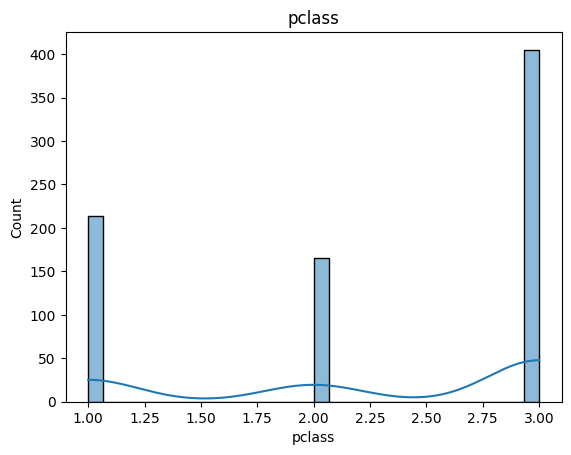

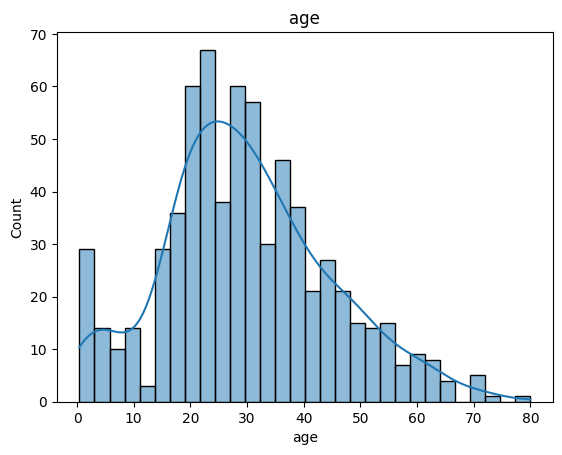

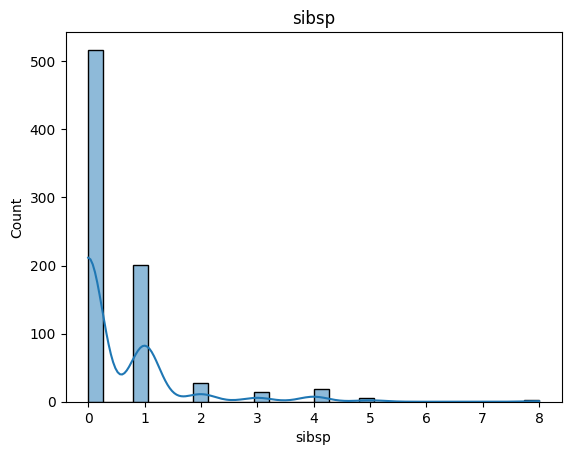

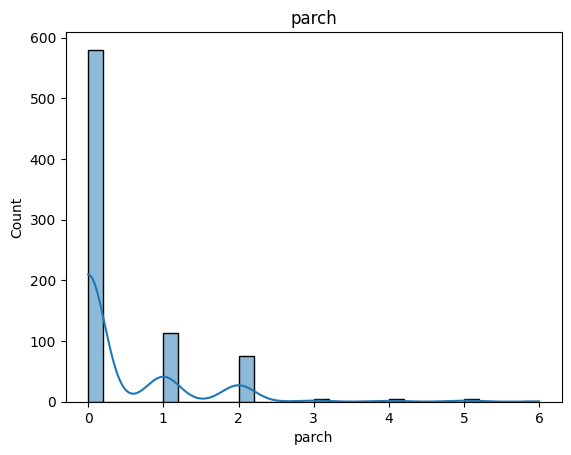

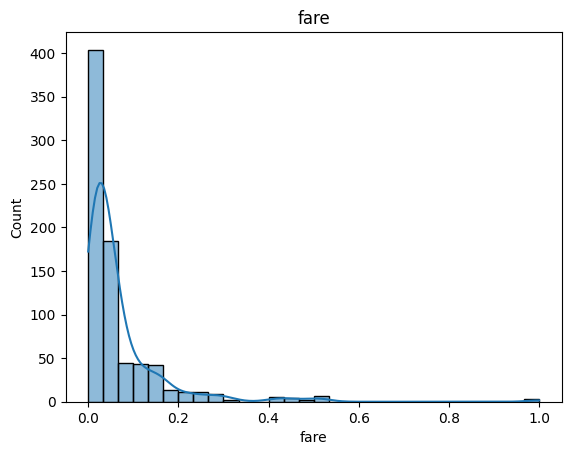

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    plt.show()

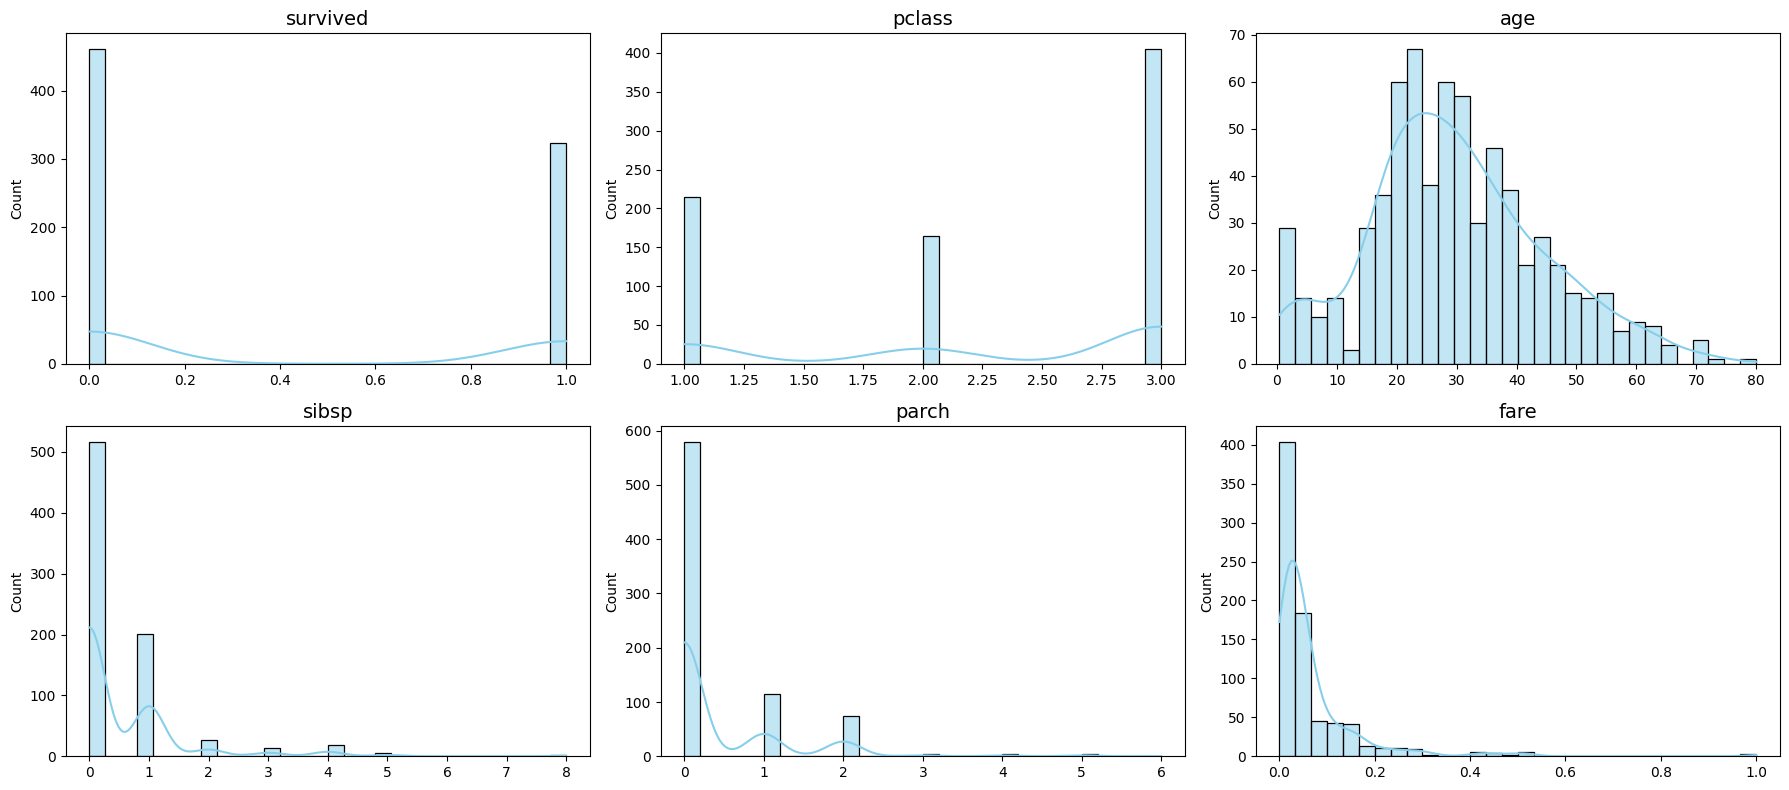

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create grid layout
n_cols = 3   # number of plots per row
n_rows = -(-len(numeric_cols) // n_cols)  # ceiling division

plt.figure(figsize=(n_cols*6, n_rows*4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(col, fontsize=14)
    plt.xlabel("")   # remove xlabel to keep it clean
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


## Delete Data Base in SQL

In [47]:
import psycopg2
from psycopg2 import sql
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

# Database connection parameters
host = "localhost"
user = "postgres"
password = "mohammad"
db_to_delete = "test"   # Database you want to delete

try:
    # Connect to the default 'postgres' database
    conn = psycopg2.connect(
        dbname="postgres",  # must not connect to db_to_delete
        user=user,
        password=password,
        host=host
    )
    
    # Allow running commands outside a transaction
    conn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)

    cursor = conn.cursor()

    # Kill all connections to the target database
    cursor.execute(
        sql.SQL("""
            SELECT pg_terminate_backend(pid)
            FROM pg_stat_activity
            WHERE datname = %s
            AND pid <> pg_backend_pid();
        """),
        [db_to_delete]
    )

    # Drop the database
    cursor.execute(
        sql.SQL("DROP DATABASE IF EXISTS {}").format(
            sql.Identifier(db_to_delete)
        )
    )

    print(f"Database '{db_to_delete}' deleted successfully!")

except Exception as e:
    print("Error:", e)

finally:
    if cursor:
        cursor.close()
    if conn:
        conn.close()


Database 'test' deleted successfully!
